# California Housing Prices

When you are learning about machine learning, it is best to experiment with real-world data and problem sets and not only artificial datasets. There are a lot of websites that offer interesting open datasets, ranging across all sorts of domains, here are a few places you can look to get data:

* [UC Irvine ML Repo](http://archive.ics.uci.edu/ml/index.php)
* [Kaggle datasets collection](https://www.kaggle.com/datasets)
* [Amazon's AWS datasets](https://registry.opendata.aws)
* [Open Data Monitor](https://opendatamonitor.eu)
* [Nasdaq Data Link](https://data.nasdaq.com)
* [Datahub](https://datahub.io/collections)
* [FiveThirtyEight](https://data.fivethirtyeight.com)
* [World Bank Open Data](https://data.worldbank.org)

In this case study we'll use the California Housing Prices dataset. This dataset is based on data from the 1990 California census. It is not recent, but it has many qualities for learning.

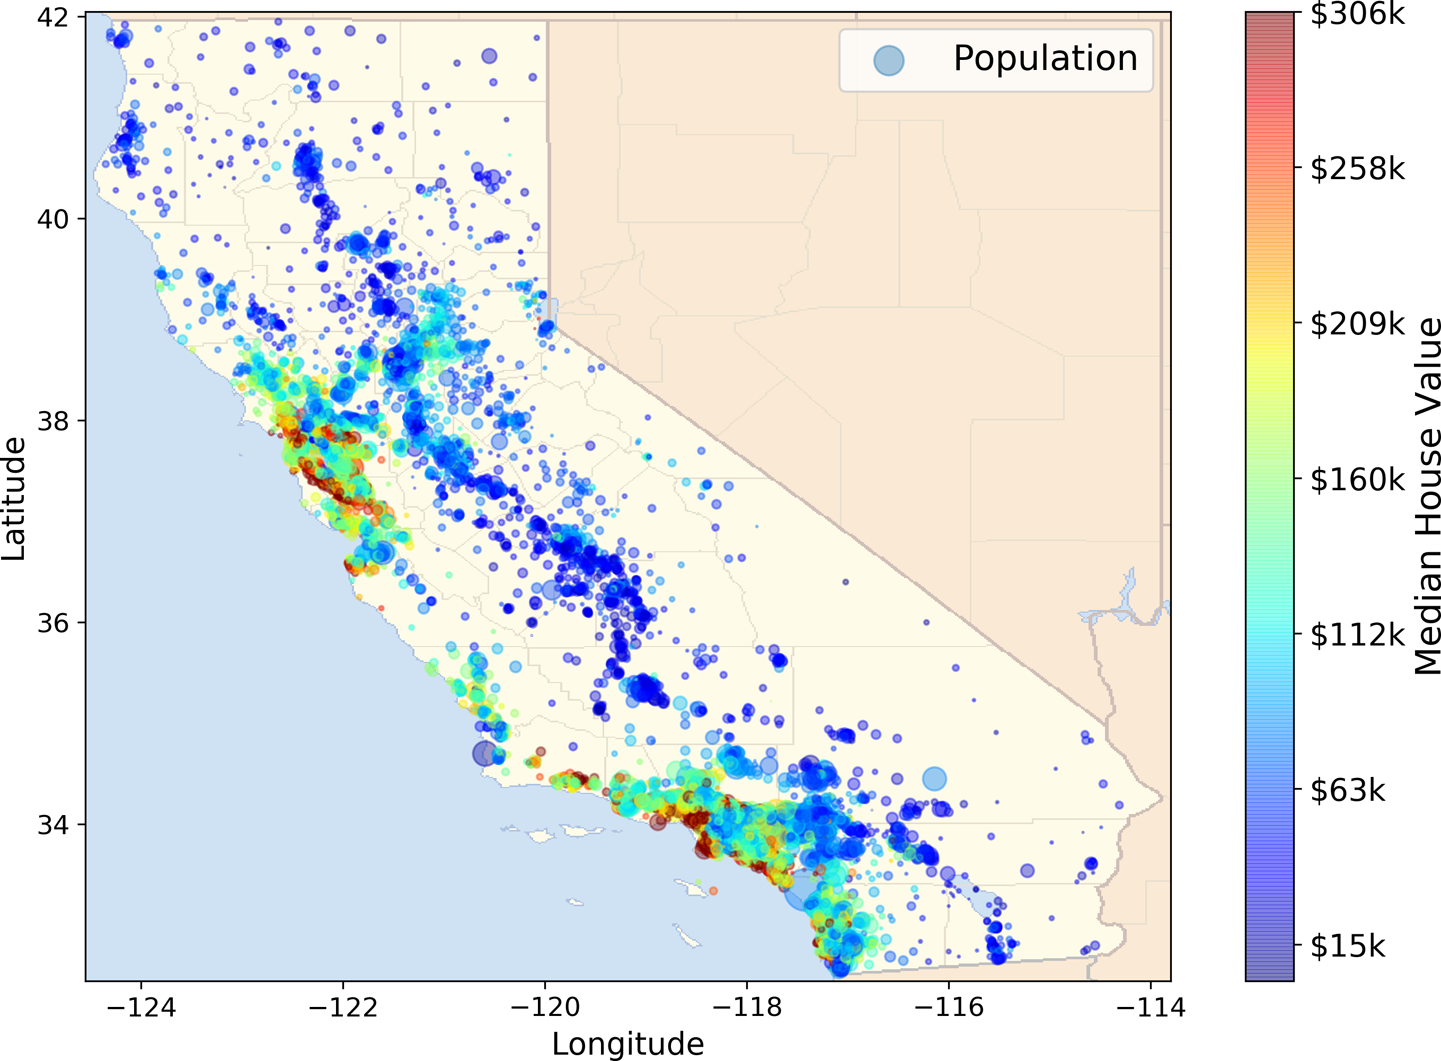



As a well-trained data scientist, the first thing to do is pull out your machine learning project checklist. This checklist should guide you through your ML projects and consists of 8 main steps:

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

In practice, you can adjust this list at will to meet your specific needs.

## Look at the Big Picture

The first question to ask your client, when framing the problem, is what exactly the business objective is. Indeed, the objective will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it. 

The next question to ask is what the current solution looks like (if any). The current situation will often give you a reference for performance, as well as insights on how to solve the problem.

In [1]:
import matplotlib as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
# set notebook environment
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv("data/housing.csv")
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9055,-118.13,34.69,32.00,"3,670.00",765.00,"1,986.00",673.00,3.68,"108,800.00",INLAND
4169,-118.21,34.10,40.00,"1,684.00",316.00,795.00,330.00,5.27,"218,300.00",<1H OCEAN
14003,-116.90,34.52,20.00,"3,481.00",840.00,"1,694.00",587.00,1.40,"77,700.00",INLAND
7270,-118.23,33.98,25.00,986.00,310.00,"1,439.00",251.00,2.39,"183,300.00",<1H OCEAN
1749,-122.32,37.96,34.00,"2,070.00",357.00,784.00,294.00,4.04,"182,800.00",NEAR BAY


## Explore and Clean the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, except the ocean_proximity field. Its type is object, which in this case means categories as strings.

In [5]:
# let's check the summary statistics of objects columns:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,433.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,-119.57,35.63,28.64,"2,635.76",537.87,"1,425.48",499.54,3.87,"206,855.82"
std,2.00,2.14,12.59,"2,181.62",421.39,"1,132.46",382.33,1.90,"115,395.62"
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,"14,999.00"
25%,-121.80,33.93,18.00,"1,447.75",296.00,787.00,280.00,2.56,"119,600.00"
50%,-118.49,34.26,29.00,"2,127.00",435.00,"1,166.00",409.00,3.53,"179,700.00"
75%,-118.01,37.71,37.00,"3,148.00",647.00,"1,725.00",605.00,4.74,"264,725.00"
max,-114.31,41.95,52.00,"39,320.00","6,445.00","35,682.00","6,082.00",15.00,"500,001.00"


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute using the hist() function integrated in pandas:

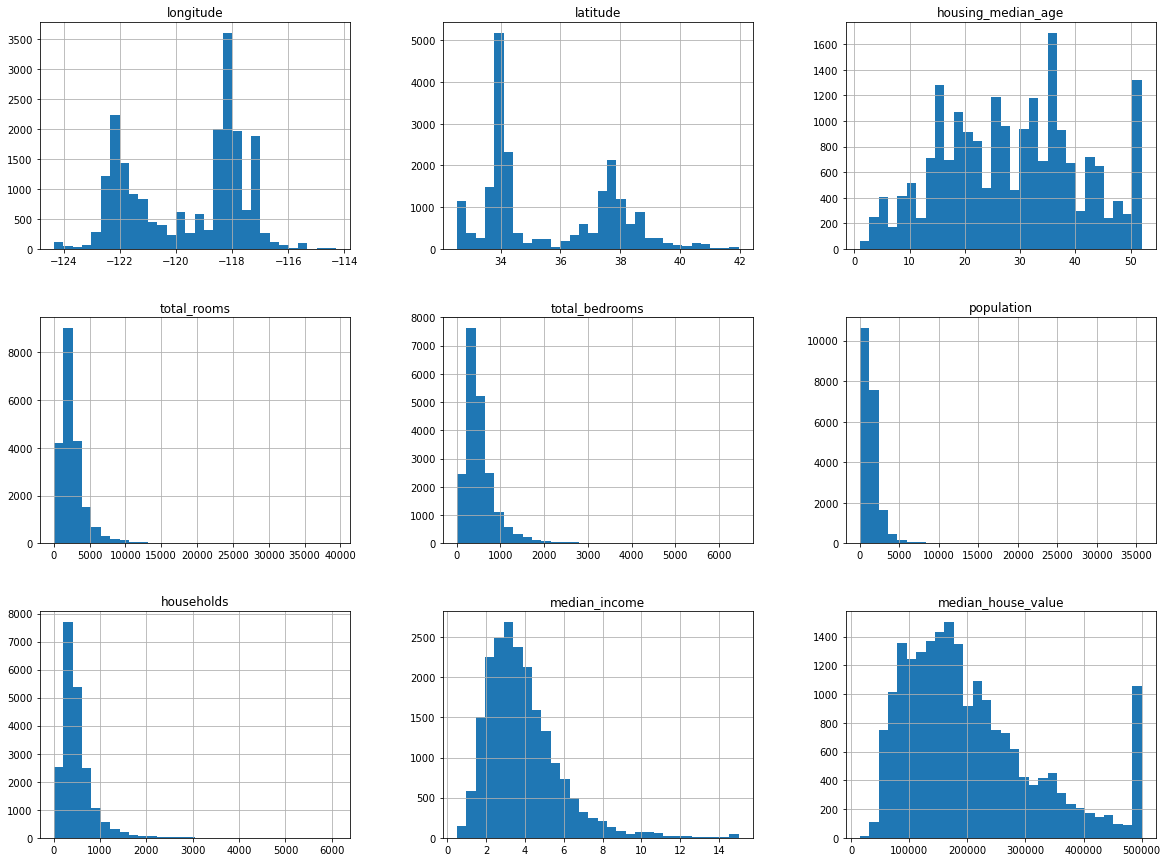

In [7]:
df.hist(bins=30, figsize=(20, 15));

At this point we try to identify inconsistencies or strange behavior in our data or other quality related problems that need to be clarified with the client. 

There are few things you might notice in these histograms:

1. The median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars. Working with preprocessed attributes is common in machine learning, and it is not necessarily a problem, but should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute. Your machine learning algorithms may learn that prices never go beyond that limit.

3. These attributes have very different scales.

4. Finally, many histograms are *tail-heavy*: They extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

<div class="alert alert-block alert-warning">
<b>Warning:</b> <br>
    Before you look at the data any further, you need to created a test set, put it aside, and never look at it.
</div>

## Create a Test Set

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=.2, random_state=42)

While splitting the data into train and test, there are more chance for the dataset to have different distributions especially in case of small dataset. The proportions of the classes on train and test dataset can differ.  
This means we are training on one dataset and evaluating with the other. This will invite error in the prediction. This is where stratified sampling is the point to note. The stratified sampling forces the distribution of the data in train and test to be same. This will give better prediction on small data sets.

Let's look at the median income histogram from above more closely: most median income values are clustered around 1.5 to 6 (in \\$10,000), bur some median incomes go far beyond 6. <code style="background:yellow;color:black">It is important to have a sufficient number of instances for each stratum, or else the estimate of a stratum's importance may be biased.</code> This means that you should not have too many strata, and each stratum should be large enough. 

The following code uses the `pd.cut()` function to create an income category attribute with 5 categories:

Figure: Histogram of income categories


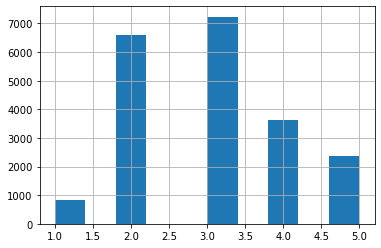

In [9]:
df['income_cat'] = pd.cut(df['median_income'],
                         bins=[0, 1.5, 3, 4.5, 6, np.inf],
                         labels=[1, 2, 3, 4, 5])

print('Figure: Histogram of income categories')
df['income_cat'].hist();

Now we are ready to do stratified sampling based on the income category. For this we can use the `StratifiedShuffleSplit` class from scikit-learn.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Let's see if this worked as expected. You can start by looking at the income category proportions in the test set:

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3   0.35
2   0.32
4   0.18
5   0.11
1   0.04
Name: income_cat, dtype: float64

In [13]:
df["income_cat"].value_counts() / len(df)

3   0.35
2   0.32
4   0.18
5   0.11
1   0.04
Name: income_cat, dtype: float64

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset.

Now you should remove the income_cat attribute so the data is back to its original state:

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project.